In [2]:
# importing required libraries 

import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

%matplotlib inline 

In [4]:
df=pd.read_csv("D:\Office work\KNN\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of patients with 0 and 1')

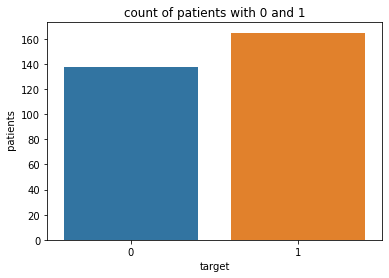

In [7]:
# target 0 indicates patient with no heart disease and target value 1 indicates patient with heart disease
# count plot 
sns.countplot(df["target"])
plt.xlabel("target")
plt.ylabel(" patients")
plt.title("count of patients with 0 and 1")


In [9]:
# separating independent and dependent variables 
y=df["target"].values

x=df.drop(["target"],axis=1)
print(x.shape)
x.head()


(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
# Scaling the data using Standardscaler
ss=StandardScaler()
X=ss.fit_transform(x)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [14]:
# spliting the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [19]:
#knn=KNeighborsClassifier(n_neighbors=k)

# we need to find the optimal value for k 

train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)
    
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))


Max test score 86.81318681318682 and k = [6]


In [22]:
knn=KNeighborsClassifier(6)
model=knn.fit(X_train,y_train)

model.score(X_test,y_test)

0.8681318681318682

In [24]:
y_pred_test=model.predict(X_test)
confusion_matrix(y_test,y_pred_test)

array([[34,  4],
       [ 8, 45]], dtype=int64)

In [25]:
pd.crosstab(y_test, y_pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,34,4,38
1,8,45,53
All,42,49,91


In [27]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.92      0.85      0.88        53

    accuracy                           0.87        91
   macro avg       0.86      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



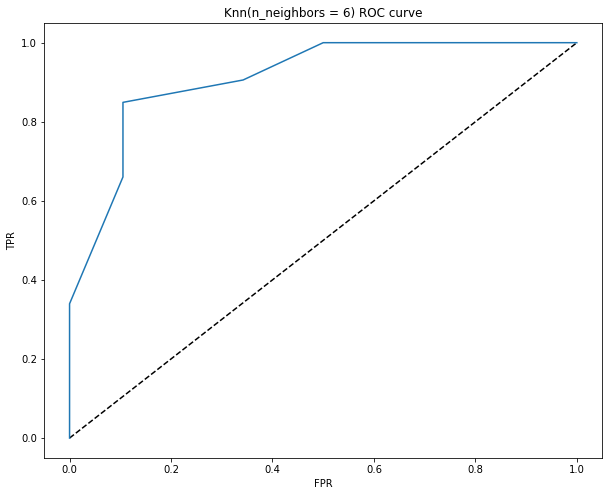

In [31]:
# to analyze model performance  further we use ROC and PRC curves
y_pred_proba= knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds= roc_curve(y_test,y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors = 6) ROC curve')
plt.show()

In [32]:
roc_auc_score(y_test,y_pred_proba)

0.9108738828202582

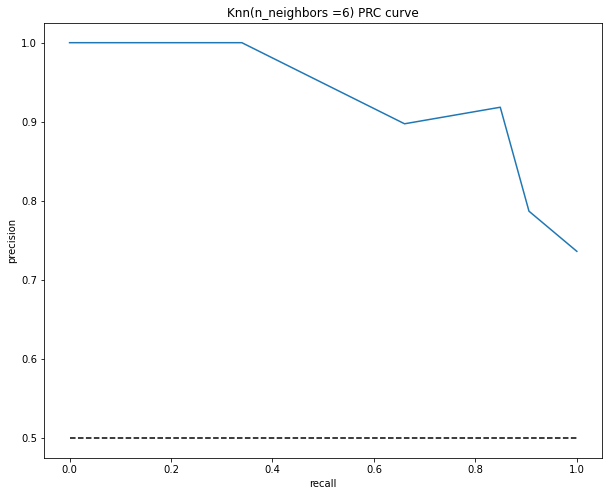

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors =6) PRC curve')
plt.show()

In [36]:
prc_auc_score=auc(recall,precision)
print(prc_auc_score)

0.9353319081485092
